In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [7]:
file_path = "/content/seeds_dataset.txt"


data = pd.read_csv(file_path, delim_whitespace=True, header=None)


data.columns = ["Area", "Perimetro", "Compacidade", "Comprimento_Nucleo", "Largura_Nucleo",
                "Coef_Assimetria", "Comprimento_Sulco", "Variedade"]


print("\nVisualização inicial do conjunto de dados:\n")
print(data.head())


Visualização inicial do conjunto de dados:

    Area  Perimetro  Compacidade  Comprimento_Nucleo  Largura_Nucleo  \
0  15.26      14.84       0.8710               5.763           3.312   
1  14.88      14.57       0.8811               5.554           3.333   
2  14.29      14.09       0.9050               5.291           3.337   
3  13.84      13.94       0.8955               5.324           3.379   
4  16.14      14.99       0.9034               5.658           3.562   

   Coef_Assimetria  Comprimento_Sulco  Variedade  
0            2.221              5.220          1  
1            1.018              4.956          1  
2            2.699              4.825          1  
3            2.259              4.805          1  
4            1.355              5.175          1  


<ipython-input-7-3f0b842dbb09>:4: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(file_path, delim_whitespace=True, header=None)



Estatísticas descritivas:

             Area   Perimetro  Compacidade  Comprimento_Nucleo  \
count  210.000000  210.000000   210.000000          210.000000   
mean    14.847524   14.559286     0.870999            5.628533   
std      2.909699    1.305959     0.023629            0.443063   
min     10.590000   12.410000     0.808100            4.899000   
25%     12.270000   13.450000     0.856900            5.262250   
50%     14.355000   14.320000     0.873450            5.523500   
75%     17.305000   15.715000     0.887775            5.979750   
max     21.180000   17.250000     0.918300            6.675000   

       Largura_Nucleo  Coef_Assimetria  Comprimento_Sulco   Variedade  
count      210.000000       210.000000         210.000000  210.000000  
mean         3.258605         3.700201           5.408071    2.000000  
std          0.377714         1.503557           0.491480    0.818448  
min          2.630000         0.765100           4.519000    1.000000  
25%          2.94

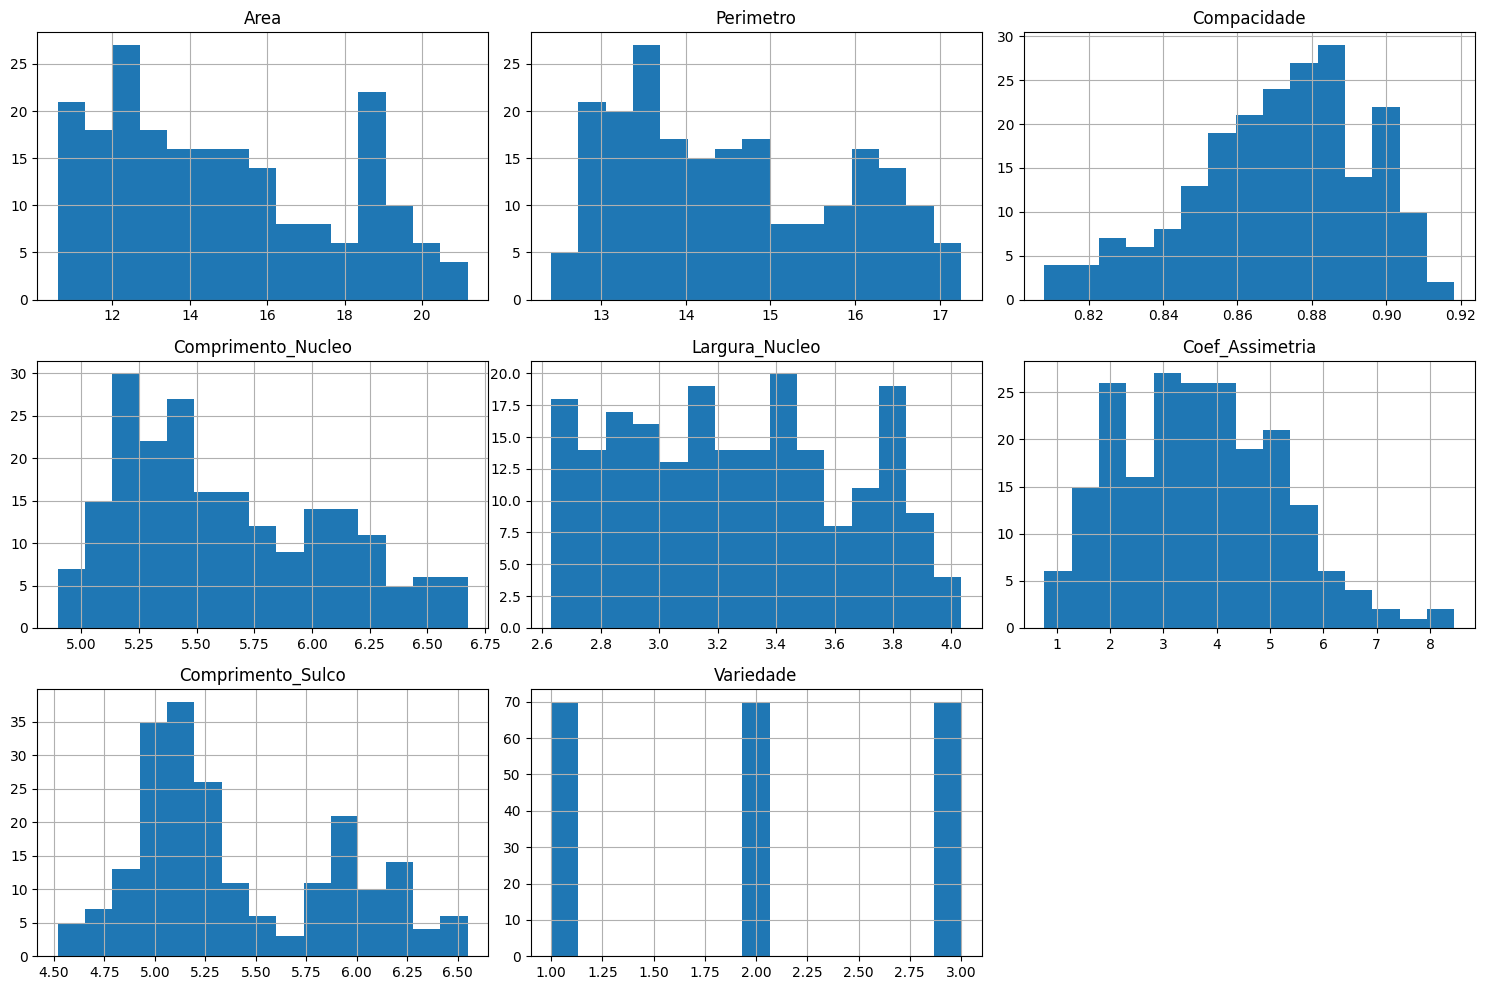


Criando boxplots...



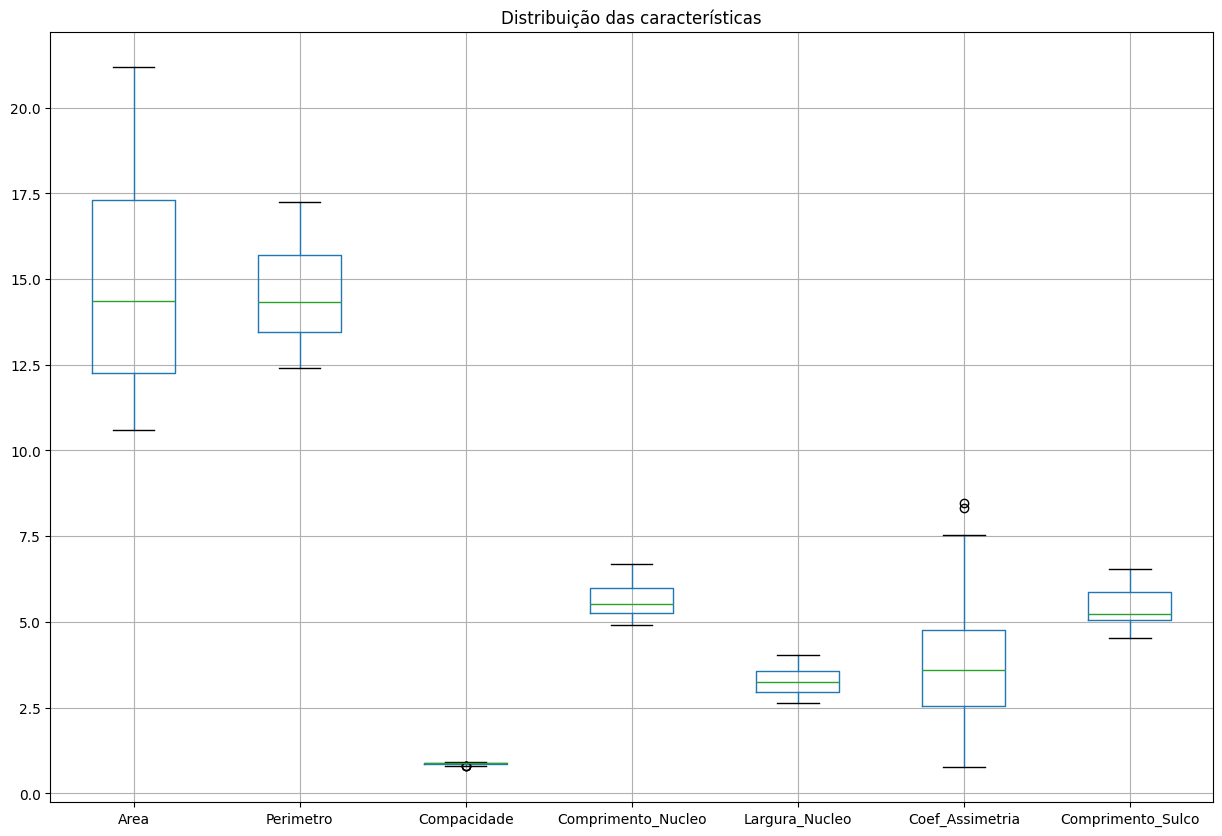


Criando gráfico de correlação...



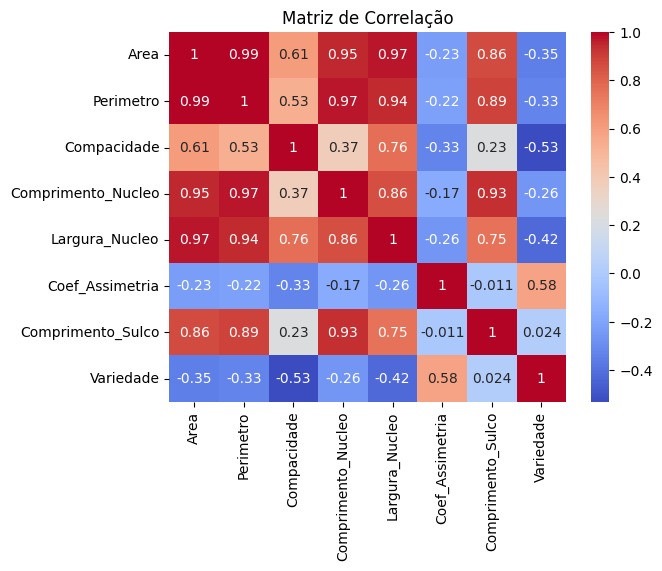


Verificando valores ausentes:

Area                  0
Perimetro             0
Compacidade           0
Comprimento_Nucleo    0
Largura_Nucleo        0
Coef_Assimetria       0
Comprimento_Sulco     0
Variedade             0
dtype: int64


In [8]:
descriptive_stats = data.describe()
print("\nEstatísticas descritivas:\n")
print(descriptive_stats)


print("\nCriando histogramas...\n")
data.hist(bins=15, figsize=(15, 10), layout=(3, 3))
plt.tight_layout()
plt.show()


print("\nCriando boxplots...\n")
data.iloc[:, :-1].boxplot(figsize=(15, 10))
plt.title("Distribuição das características")
plt.show()


print("\nCriando gráfico de correlação...\n")
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Matriz de Correlação")
plt.show()


print("\nVerificando valores ausentes:\n")
print(data.isnull().sum())

In [9]:
scaler = StandardScaler()
data.iloc[:, :-1] = scaler.fit_transform(data.iloc[:, :-1])
print("\nConjunto de dados padronizado:\n")
print(data.head())


X = data.iloc[:, :-1]  # Características
y = data["Variedade"]  # Rótulo

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("\nTreinando modelo KNN...")
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print("\nRelatório de Classificação KNN:\n")
print(classification_report(y_test, y_pred_knn))


print("\nTreinando modelo SVM...")
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print("\nRelatório de Classificação SVM:\n")
print(classification_report(y_test, y_pred_svm))


print("\nTreinando modelo Random Forest...")
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("\nRelatório de Classificação Random Forest:\n")
print(classification_report(y_test, y_pred_rf))


Conjunto de dados padronizado:

       Area  Perimetro  Compacidade  Comprimento_Nucleo  Largura_Nucleo  \
0  0.142098   0.215462     0.000061            0.304218        0.141702   
1  0.011188   0.008224     0.428515           -0.168625        0.197432   
2 -0.192067  -0.360201     1.442383           -0.763637        0.208048   
3 -0.347091  -0.475333     1.039381           -0.688978        0.319508   
4  0.445257   0.330595     1.374509            0.066666        0.805159   

   Coef_Assimetria  Comprimento_Sulco  Variedade  
0        -0.986152          -0.383577          1  
1        -1.788166          -0.922013          1  
2        -0.667479          -1.189192          1  
3        -0.960818          -1.229983          1  
4        -1.563495          -0.475356          1  

Treinando modelo KNN...

Relatório de Classificação KNN:

              precision    recall  f1-score   support

           1       0.82      0.90      0.86        20
           2       1.00      0.95      0.9

In [10]:
results = {
    "Modelo": ["KNN", "SVM", "Random Forest"],
    "Acurácia": [
        accuracy_score(y_test, y_pred_knn),
        accuracy_score(y_test, y_pred_svm),
        accuracy_score(y_test, y_pred_rf),
    ],
}

results_df = pd.DataFrame(results)
print("\nComparação dos modelos:\n")
print(results_df)


print("\nOtimização de modelos com GridSearchCV...")


Comparação dos modelos:

          Modelo  Acurácia
0            KNN  0.904762
1            SVM  0.920635
2  Random Forest  0.888889

Otimização de modelos com GridSearchCV...


In [11]:
param_grid_knn = {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance']}
grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5)
grid_knn.fit(X_train, y_train)
y_pred_knn_opt = grid_knn.best_estimator_.predict(X_test)
print("\nMelhores parâmetros para KNN:", grid_knn.best_params_)
print("\nRelatório de Classificação KNN Otimizado:\n")
print(classification_report(y_test, y_pred_knn_opt))


param_grid_svm = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
grid_svm = GridSearchCV(SVC(), param_grid_svm, cv=5)
grid_svm.fit(X_train, y_train)
y_pred_svm_opt = grid_svm.best_estimator_.predict(X_test)
print("\nMelhores parâmetros para SVM:", grid_svm.best_params_)
print("\nRelatório de Classificação SVM Otimizado:\n")
print(classification_report(y_test, y_pred_svm_opt))


param_grid_rf = {'n_estimators': [50, 100, 150], 'max_depth': [None, 10, 20]}
grid_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5)
grid_rf.fit(X_train, y_train)
y_pred_rf_opt = grid_rf.best_estimator_.predict(X_test)
print("\nMelhores parâmetros para Random Forest:", grid_rf.best_params_)
print("\nRelatório de Classificação Random Forest Otimizado:\n")
print(classification_report(y_test, y_pred_rf_opt))


optimized_results = {
    "Modelo": ["KNN", "SVM", "Random Forest"],
    "Acurácia": [
        accuracy_score(y_test, y_pred_knn_opt),
        accuracy_score(y_test, y_pred_svm_opt),
        accuracy_score(y_test, y_pred_rf_opt),
    ],
}

optimized_results_df = pd.DataFrame(optimized_results)
print("\nComparação dos modelos otimizados:\n")
print(optimized_results_df)


print("\nInsights sobre os resultados:\n")
print("- O modelo com melhor desempenho foi o:", optimized_results_df.sort_values(by='Acurácia', ascending=False).iloc[0, 0])
print("- As características mais relevantes podem ser exploradas futuramente usando análise de importância de features nos modelos como Random Forest.")



Melhores parâmetros para KNN: {'n_neighbors': 5, 'weights': 'uniform'}

Relatório de Classificação KNN Otimizado:

              precision    recall  f1-score   support

           1       0.82      0.90      0.86        20
           2       1.00      0.95      0.98        21
           3       0.90      0.86      0.88        22

    accuracy                           0.90        63
   macro avg       0.91      0.91      0.91        63
weighted avg       0.91      0.90      0.91        63


Melhores parâmetros para SVM: {'C': 1, 'kernel': 'linear'}

Relatório de Classificação SVM Otimizado:

              precision    recall  f1-score   support

           1       0.85      0.85      0.85        20
           2       1.00      0.95      0.98        21
           3       0.87      0.91      0.89        22

    accuracy                           0.90        63
   macro avg       0.91      0.90      0.90        63
weighted avg       0.91      0.90      0.91        63


Melhores parâmetr